In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [112]:
df= pd.read_csv("diabetes.csv")

In [113]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* **Supervised data:** Because of the "Outcome" target column.
* **Classification Problem:** Because the output is binary (Yes/No or 0/1).

In [115]:
df.shape

(768, 9)

In [116]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploratory Data Analysis

In [117]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [118]:
# distribution of outcome variable
df['Outcome'].value_counts()*100/len(df)

,count
Outcome,
0,65.104167
1,34.895833


<Axes: xlabel='Age', ylabel='Count'>

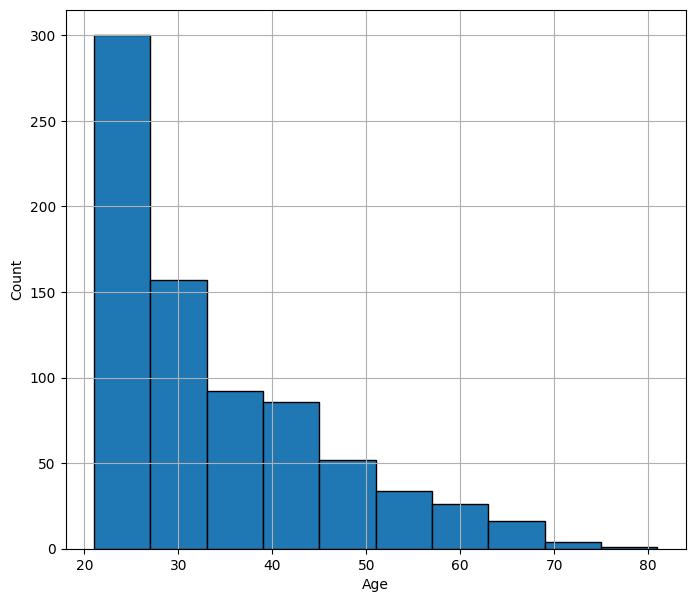

In [119]:
# plot the hist of the age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)
df['Age'].hist(edgecolor="black")

In [120]:
df['Age'].max()

81

In [121]:
df['Age'].min()

21

In [122]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


/tmp/ipython-input-123-1235783354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
/tmp/ipython-input-123-1235783354.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
/tmp/ipython-input-123-12357

<Axes: xlabel='Age', ylabel='Density'>

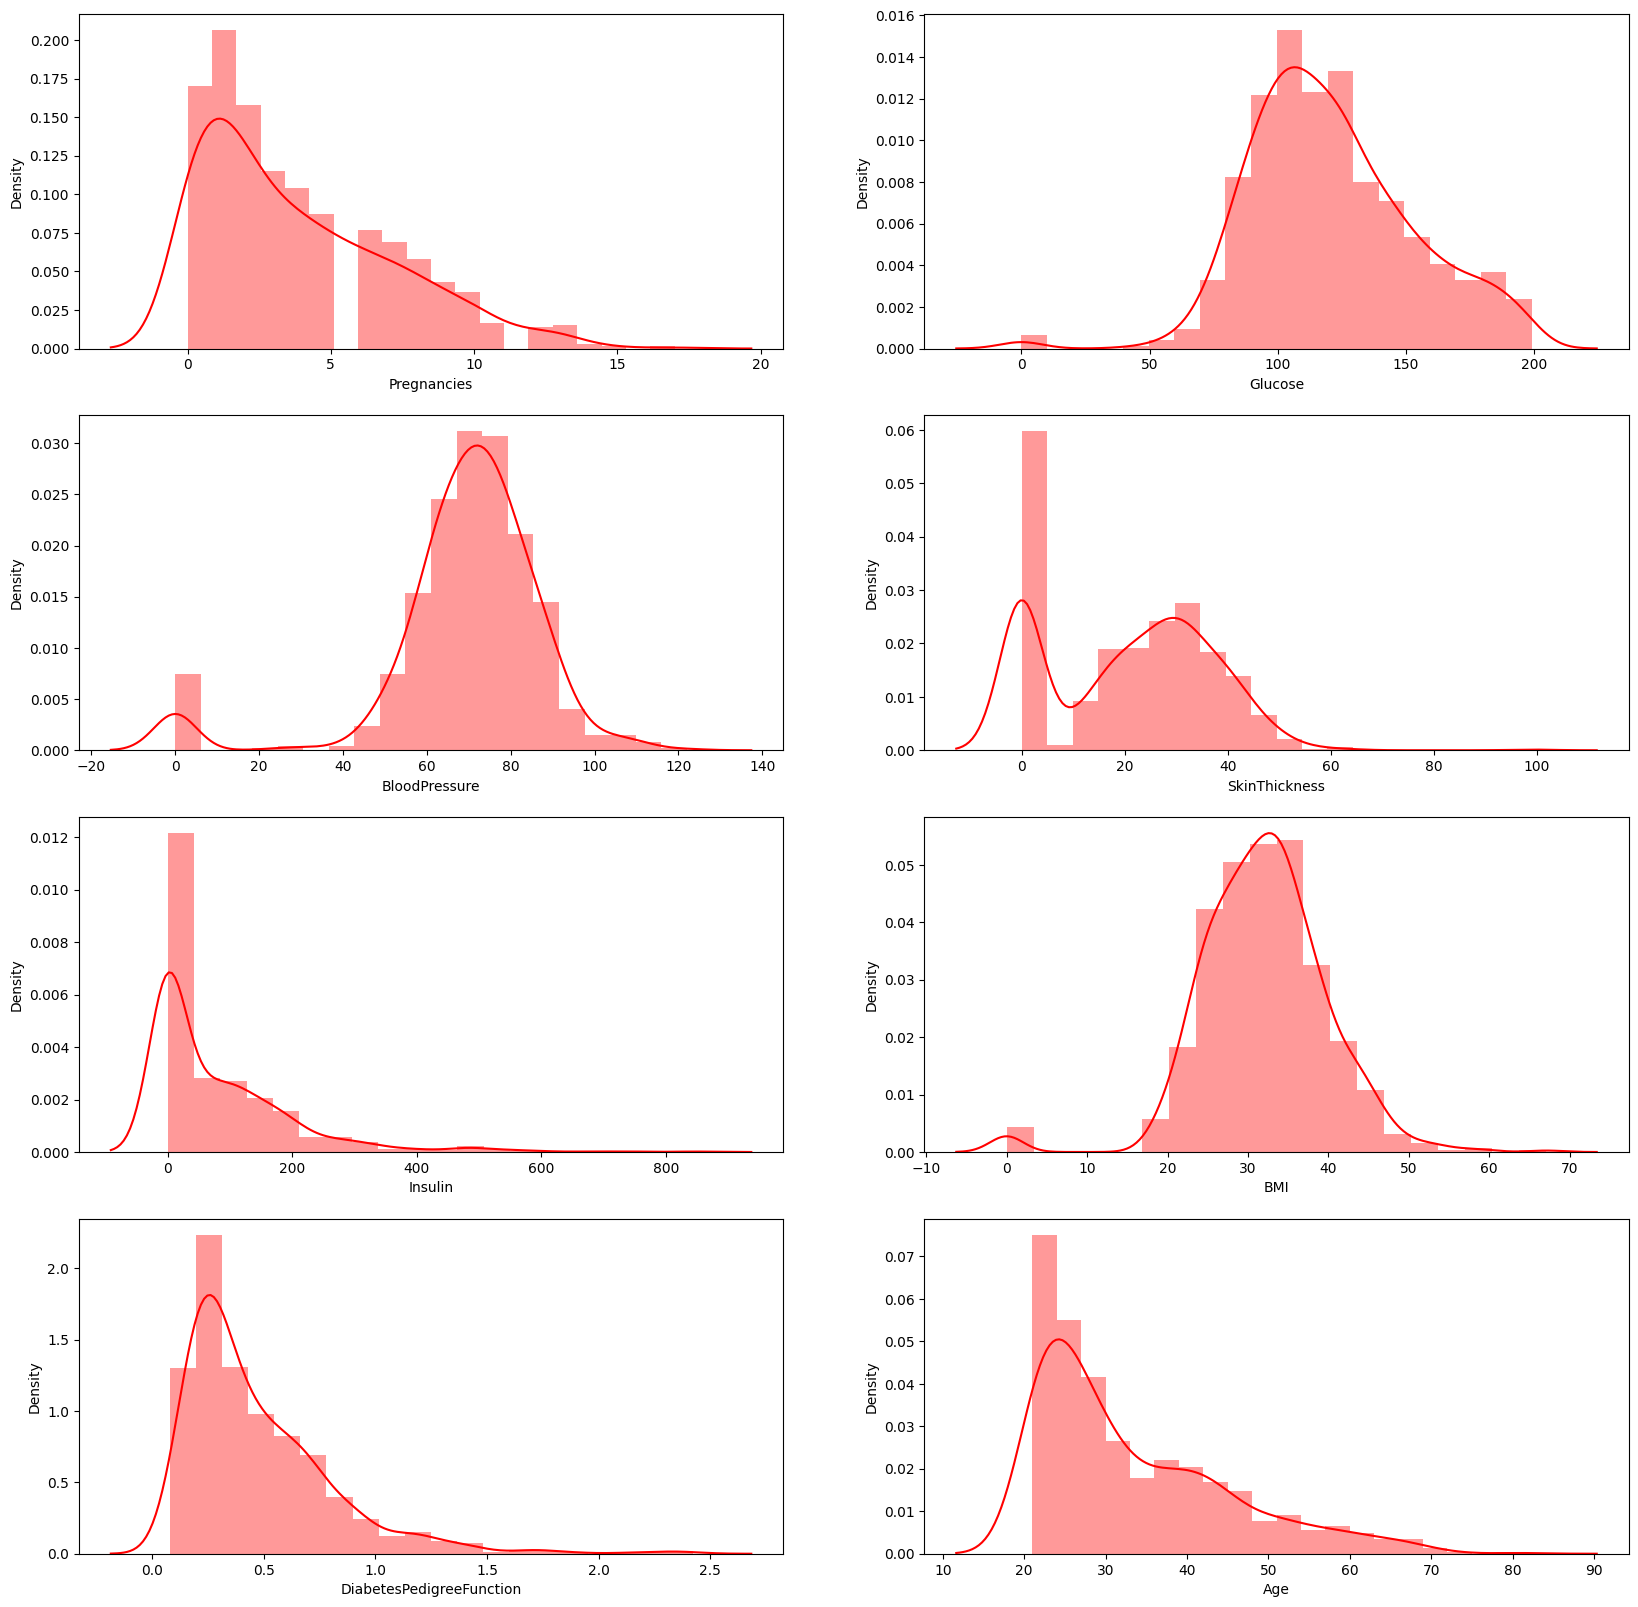

In [123]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")


In [124]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [125]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [126]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [127]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [128]:
df.groupby("Outcome").agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


In [129]:
df.groupby("Outcome").agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [130]:
df.groupby("Outcome").agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [131]:
df.groupby("Outcome").agg({'SkinThickness':'max'})

,SkinThickness
Outcome,
0,60
1,99


In [132]:
df.groupby("Outcome").agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [133]:
df.groupby("Outcome").agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [134]:
df.groupby("Outcome").agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [135]:
df.groupby("Outcome").agg({'BMI':'max'})

,BMI
Outcome,
0,57.3
1,67.1


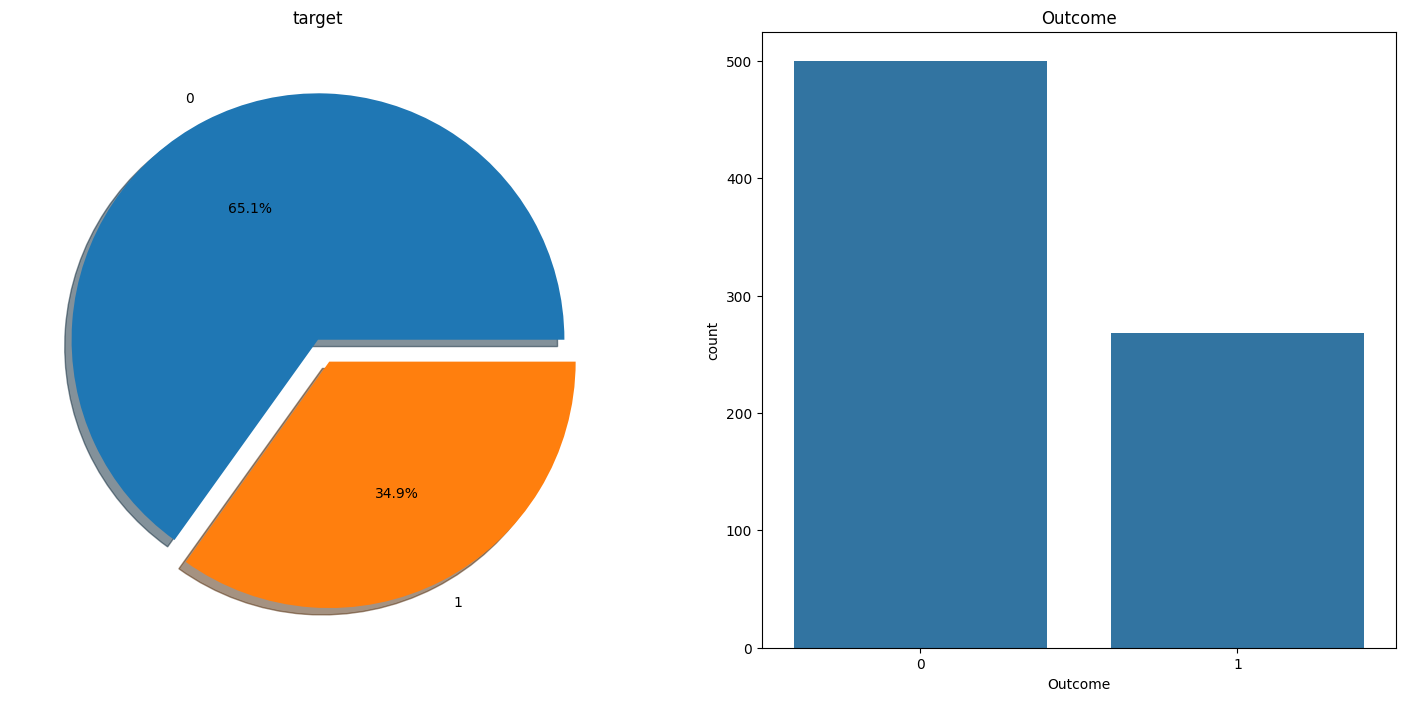

In [136]:
# 0>healthy
# 1>diabetes

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct = "%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [137]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


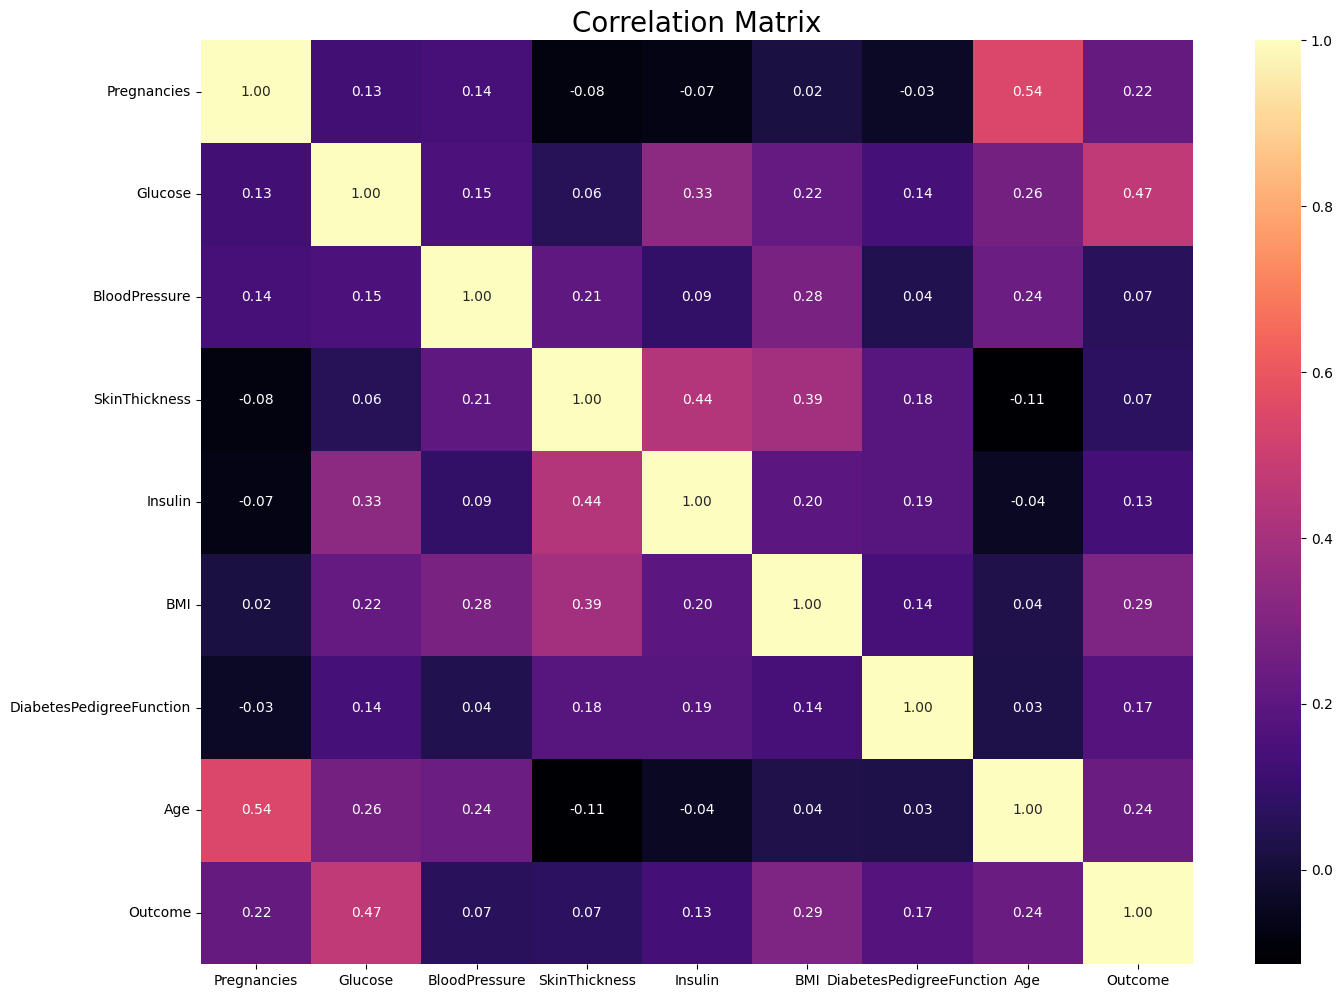

In [138]:
f,ax = plt.subplots(figsize=[16,12])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

# Handling Duplicates

In [139]:
# Duplicates
print(f"Duplicates values in Train Dataset is : {df.duplicated().sum()}")

Duplicates values in Train Dataset is : 0


# Uniqueness

In [140]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Pregnancies: 17 distinct values
Glucose: 136 distinct values
BloodPressure: 47 distinct values
SkinThickness: 51 distinct values
Insulin: 186 distinct values
BMI: 248 distinct values
DiabetesPedigreeFunction: 517 distinct values
Age: 52 distinct values
Outcome: 2 distinct values


# Missing Values

In [141]:
# Null Values
print(f'Null Values in Train Dataset is : {df.isnull().sum().sum()}')

Null Values in Train Dataset is : 0


In [142]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [143]:
# Null Values
print(f'Null Values in Train Dataset is : {df.isnull().sum().sum()}')

Null Values in Train Dataset is : 763


In [144]:
df.isnull().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

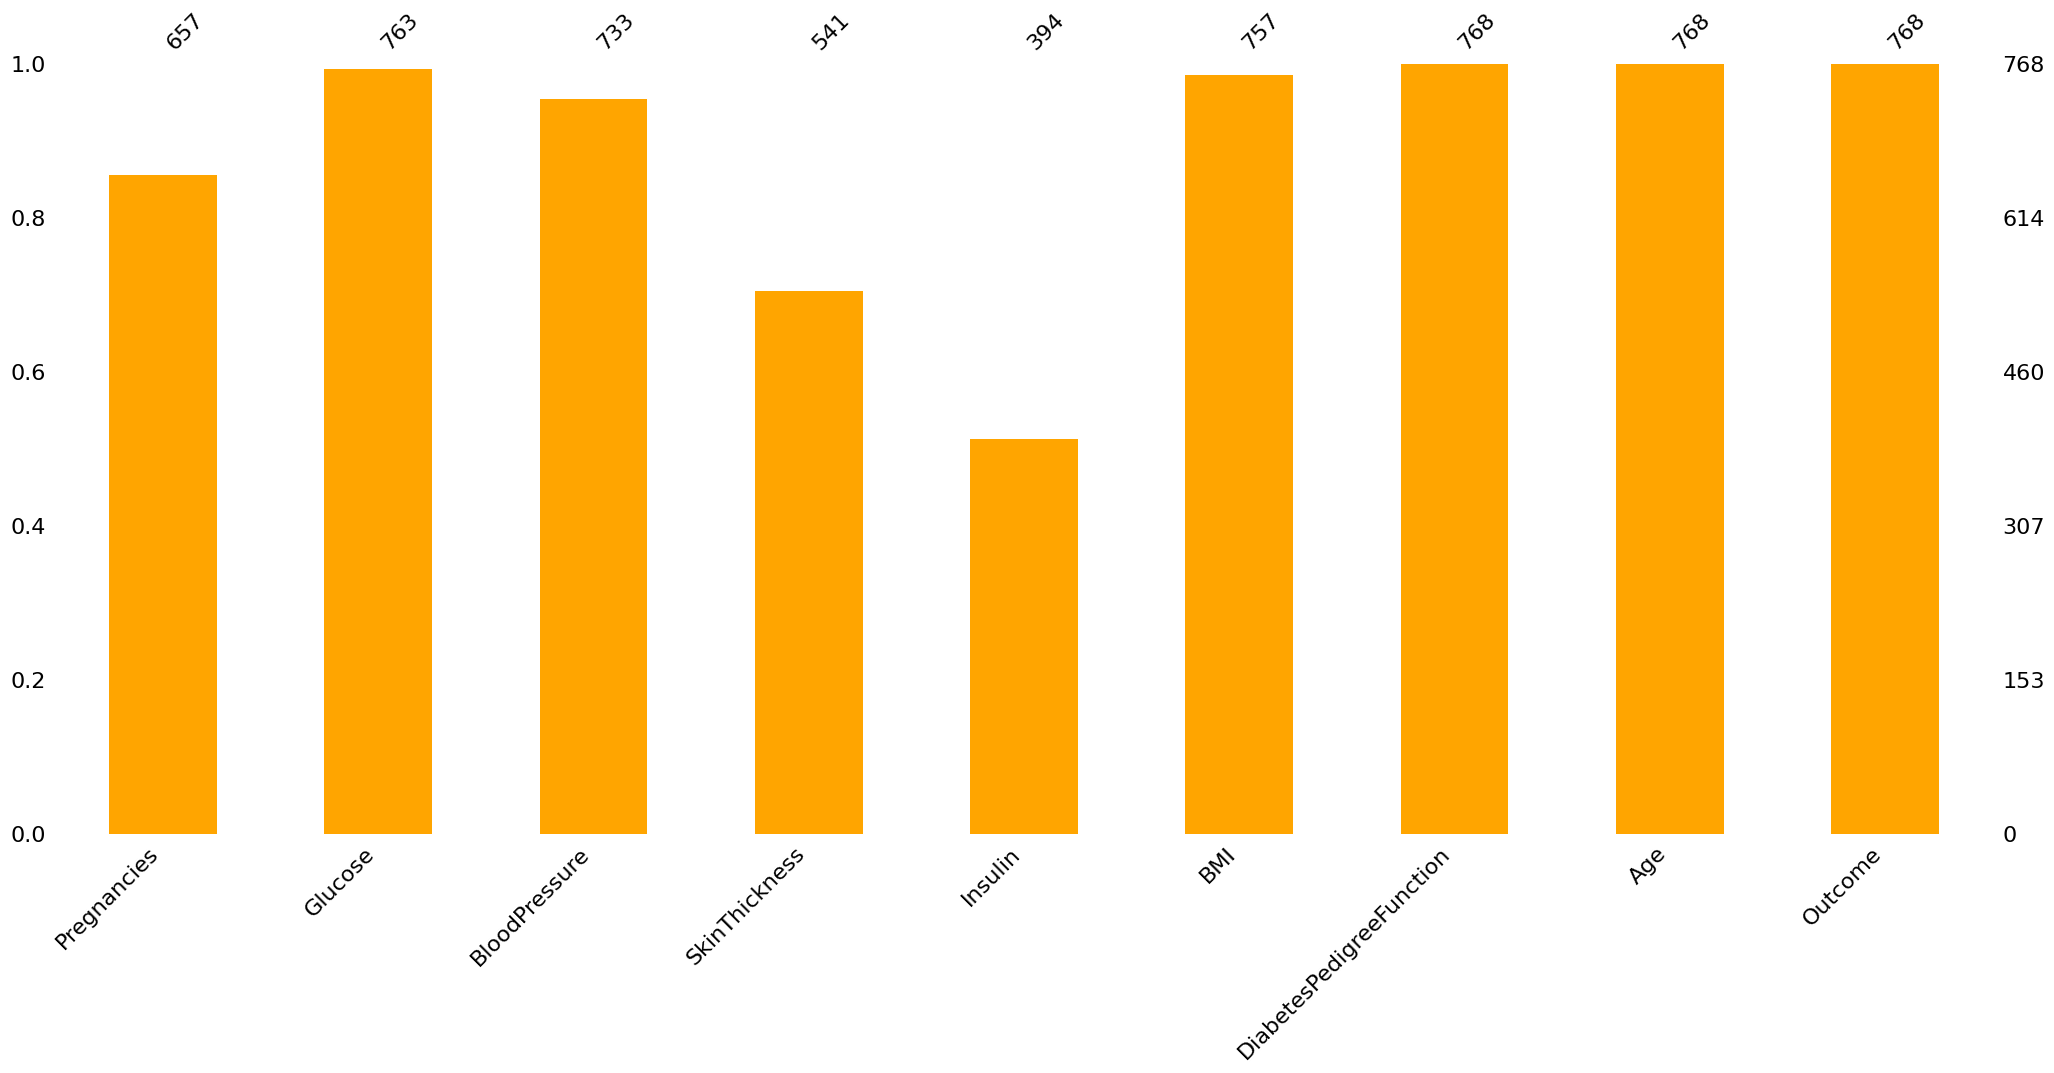

In [145]:
import missingno as msno
msno.bar(df, color="orange")

In [146]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [147]:
from sklearn.impute import SimpleImputer

# List of features to impute
features_to_impute = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Define the imputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the selected columns
df[features_to_impute] = imputer.fit_transform(df[features_to_impute])


In [148]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


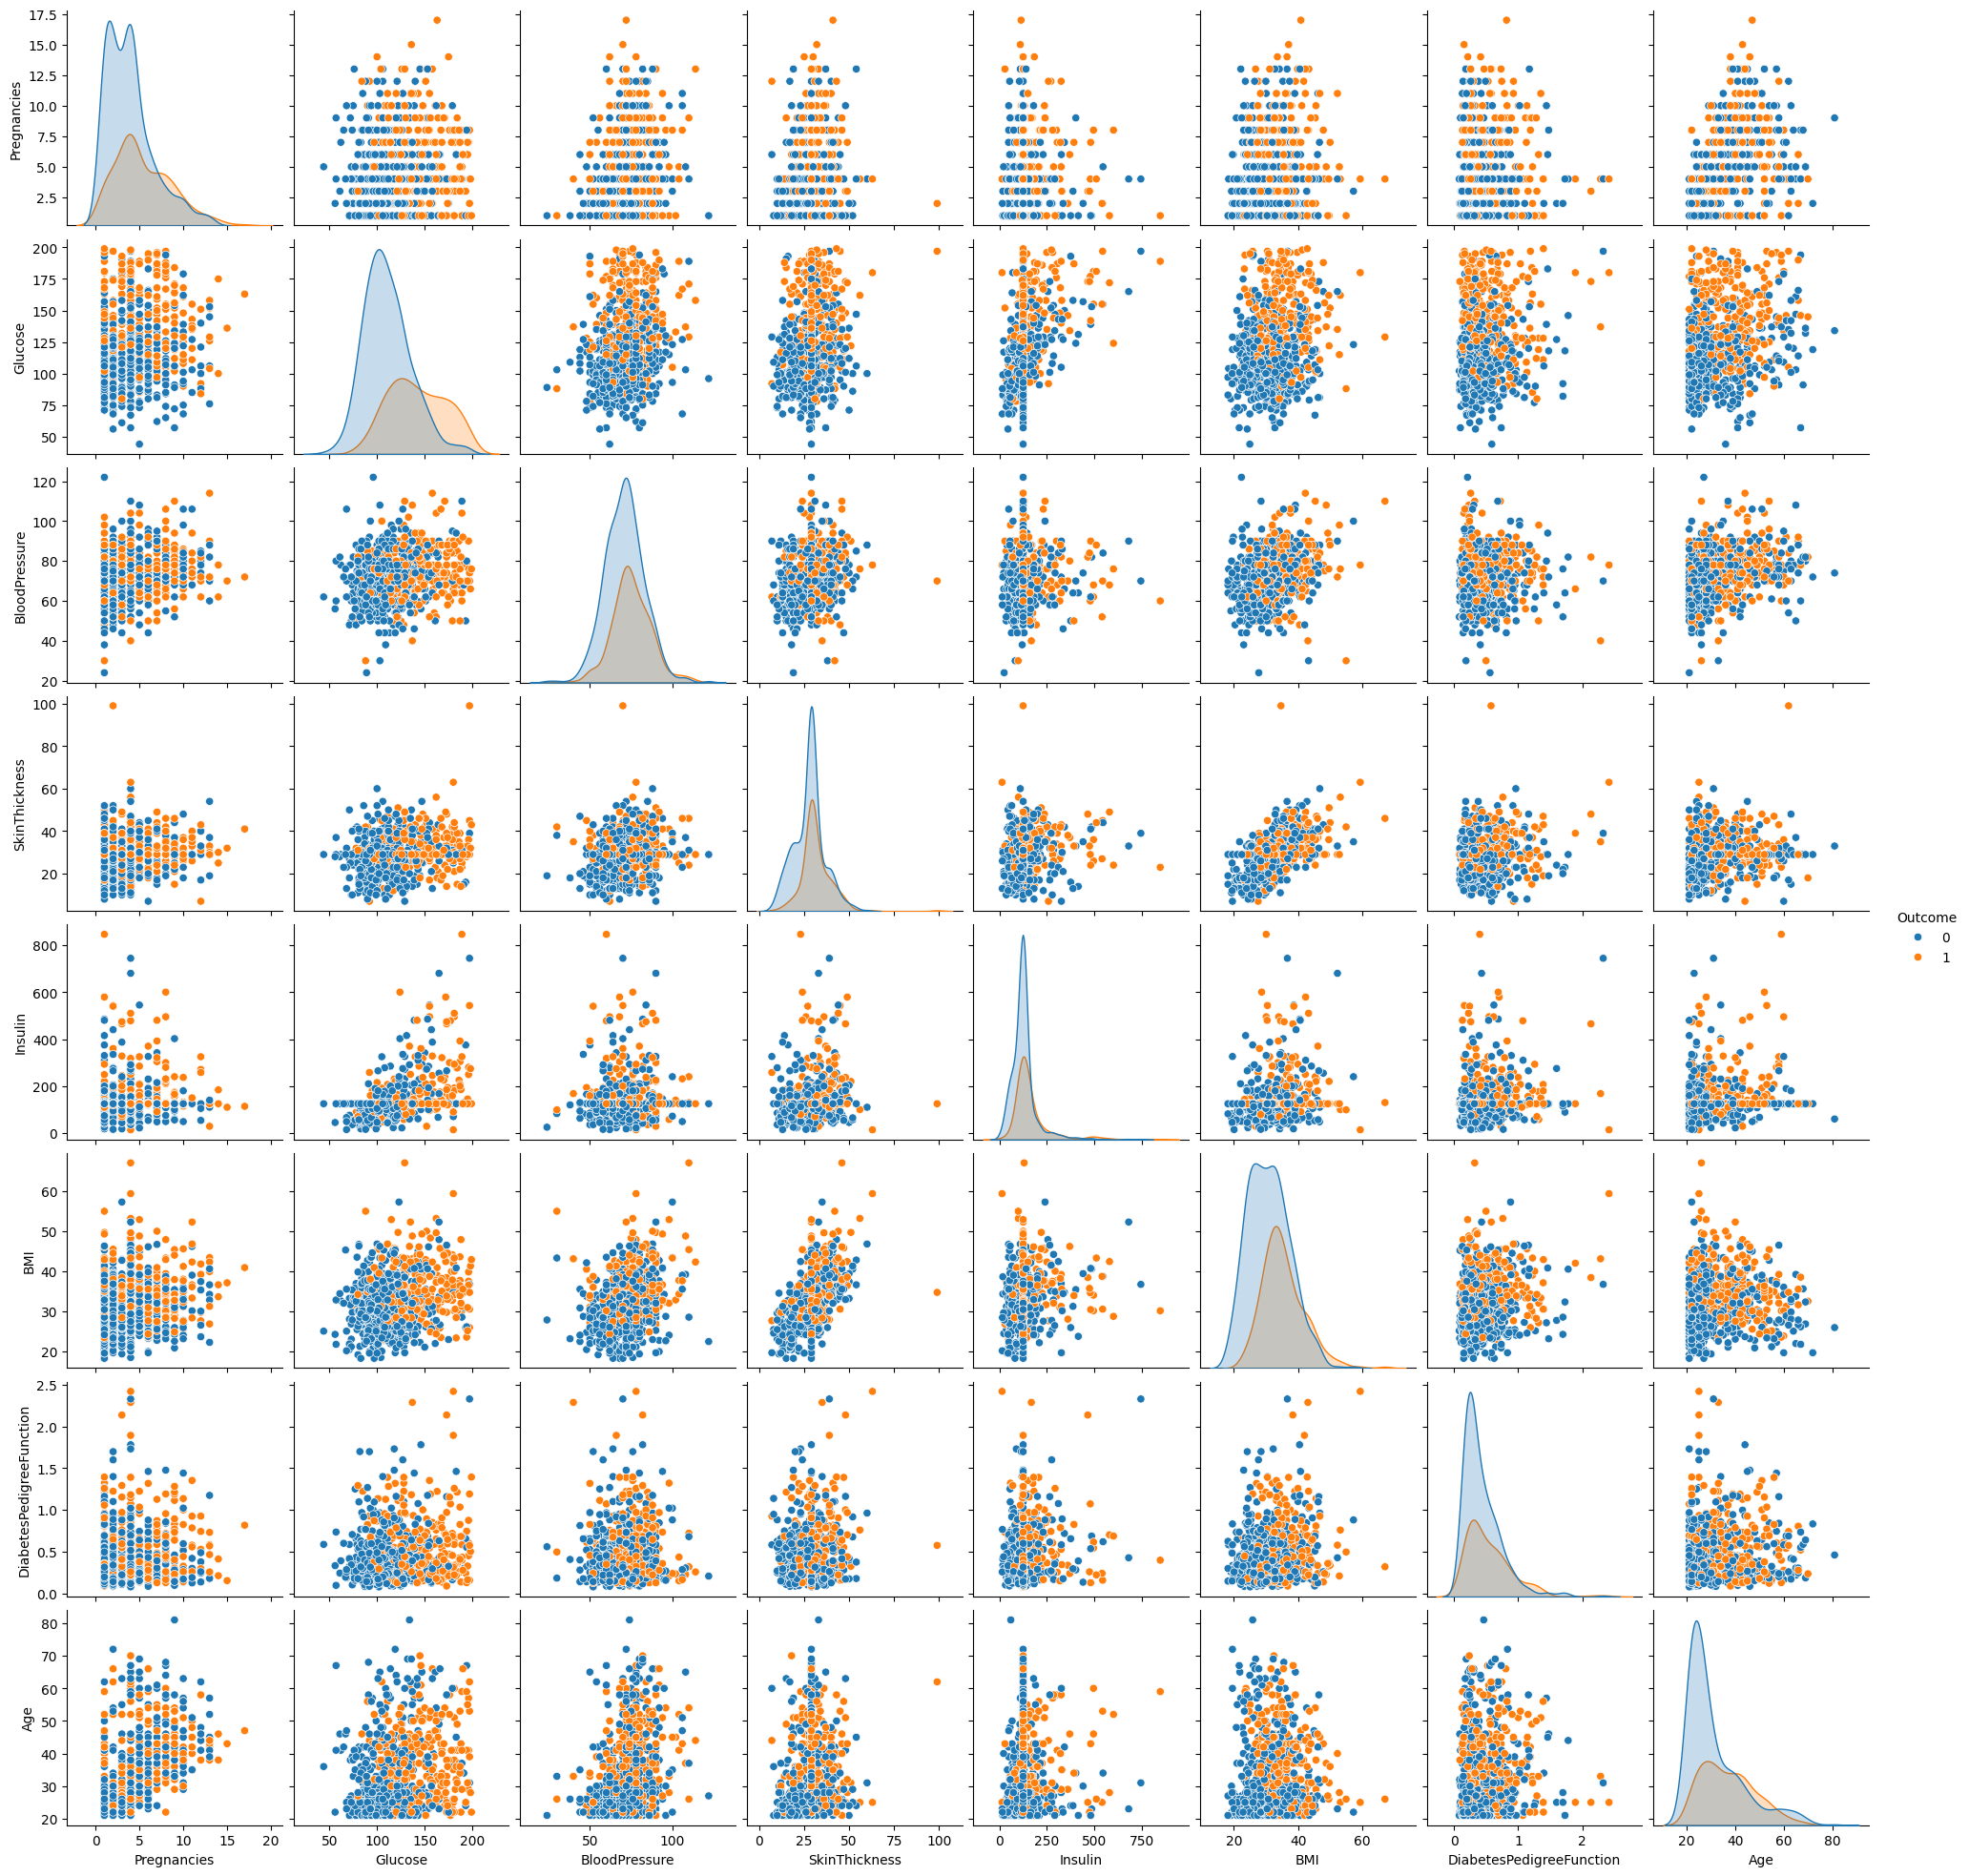

In [149]:
# pair plot
p = sns.pairplot(df, hue="Outcome")

# Outlier Detection

In [150]:
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [151]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))

# List of features with outliers
outlier_features = ['Pregnancies', 'BloodPressure', 'SkinThickness',
                    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Apply capping
for col in outlier_features:
    cap_outliers_iqr(df, col)


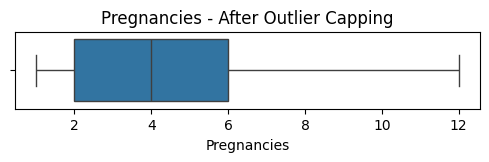

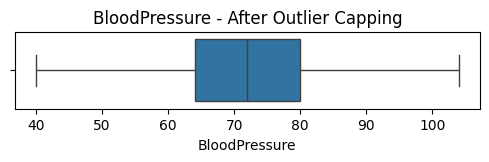

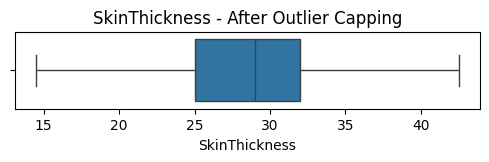

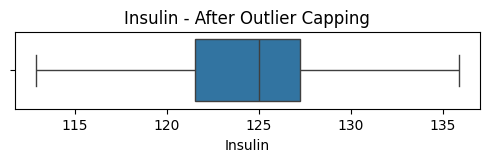

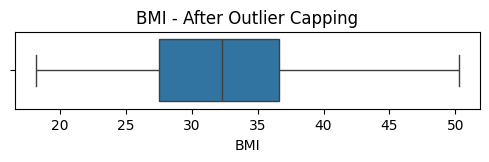

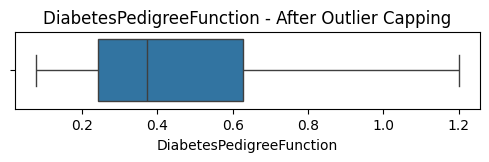

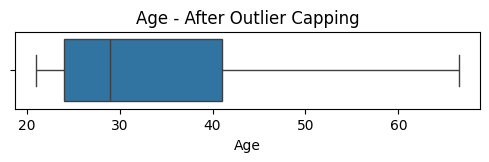

In [152]:
for col in outlier_features:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - After Outlier Capping")
    plt.show()

In [154]:
df.shape

(768, 9)

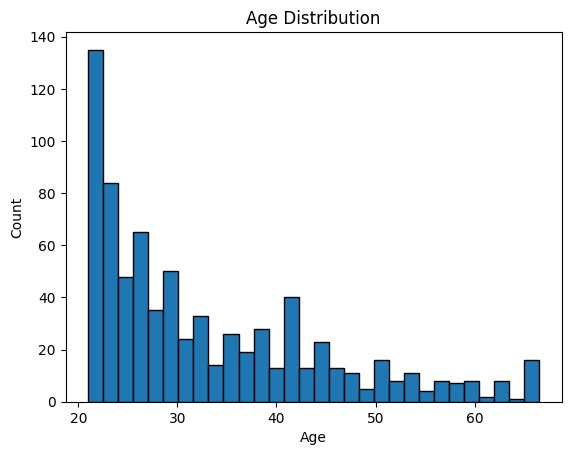

In [155]:
# Histogram for age
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [156]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/tmp/ipython-input-157-3393414910.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'], bins=30)


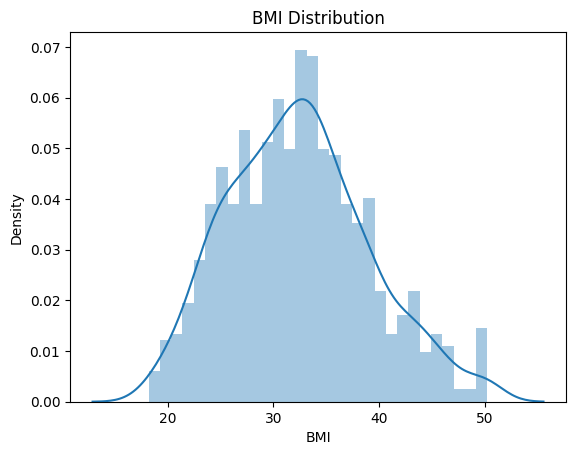

In [157]:
# Distribution plot for BMI
sns.distplot(df['BMI'], bins=30)
plt.title('BMI Distribution')
plt.show()

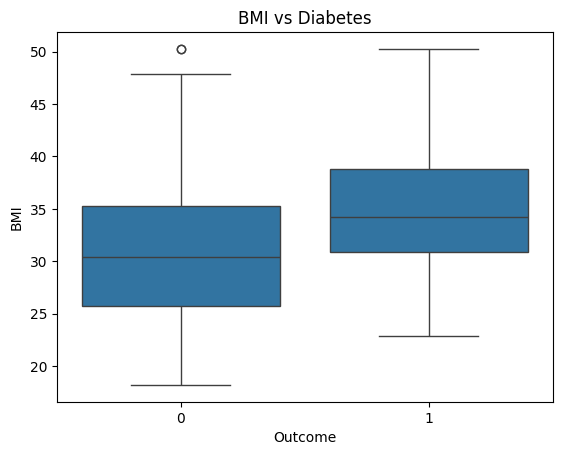

In [158]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI vs Diabetes')
plt.show()

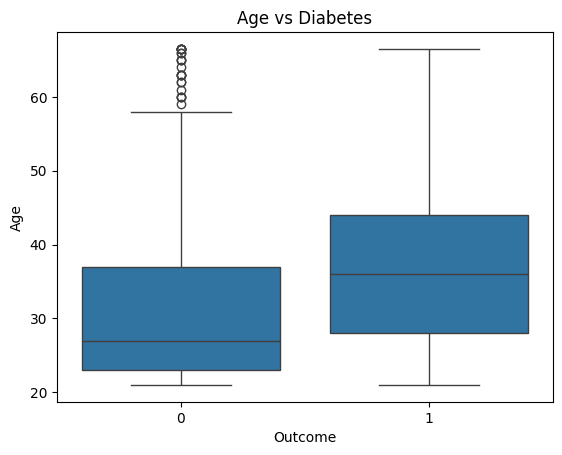

In [159]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title('Age vs Diabetes')
plt.show()

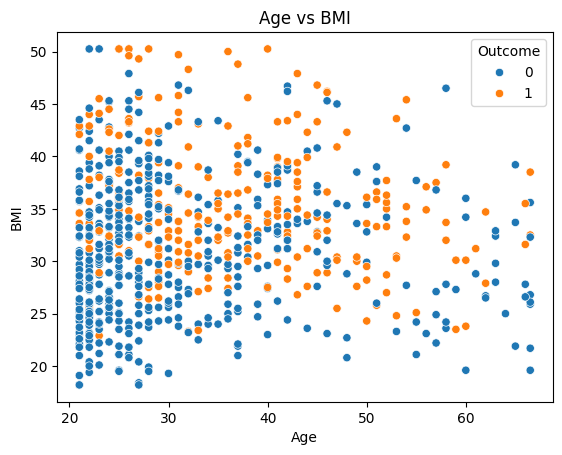

In [160]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Age vs BMI')
plt.show()

# Train-test Split

In [161]:
y=df['Outcome']
X=df.drop(['Outcome'],axis=1)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2.0,84.0,72.0,29.0,125.000,32.3,0.304,21.0
618,9.0,112.0,82.0,24.0,125.000,28.2,1.200,50.0
346,1.0,139.0,46.0,19.0,112.875,28.7,0.654,22.0
294,4.0,161.0,50.0,29.0,125.000,21.9,0.254,65.0
231,6.0,134.0,80.0,37.0,135.875,46.2,0.238,46.0
...,...,...,...,...,...,...,...,...
71,5.0,139.0,64.0,35.0,135.875,28.6,0.411,26.0
106,1.0,96.0,104.0,29.0,125.000,22.4,0.207,27.0
270,10.0,101.0,86.0,37.0,125.000,45.6,1.136,38.0
435,4.0,141.0,72.0,29.0,125.000,42.4,0.205,29.0


# Feature Scaling

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability (optional)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.814662,-1.256881,-0.020159,0.057034,0.055961,0.002628,-0.531720,-1.046838
618,1.658090,-0.326051,0.833455,-0.606204,0.055961,-0.609888,2.644625,1.513601
346,-1.167912,0.571536,-2.239553,-1.269442,-1.450102,-0.535191,0.709040,-0.958547
294,-0.108161,1.302903,-1.898108,0.057034,0.055961,-1.551070,-0.708971,2.837966
231,0.598339,0.405316,0.662732,1.118215,1.406759,2.079204,-0.765691,1.160437



Scaled Test Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.598339,-0.791466,-1.215217,0.587625,1.406759,0.256598,-0.085046,0.895564
324,-0.814662,-0.326051,0.235925,0.454977,0.055961,0.510567,-1.084744,-1.046838
624,-0.814662,-0.459026,-0.703049,0.057034,0.055961,-0.221463,-1.049294,-1.046838
690,1.304839,-0.492270,0.662732,0.057034,0.055961,-1.147706,1.425136,0.100945
473,0.951589,0.471804,1.516345,0.057034,0.055961,-0.355918,-0.864952,1.513601


In [165]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


# Model Building

## **Logistic Regreesion**

In [166]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



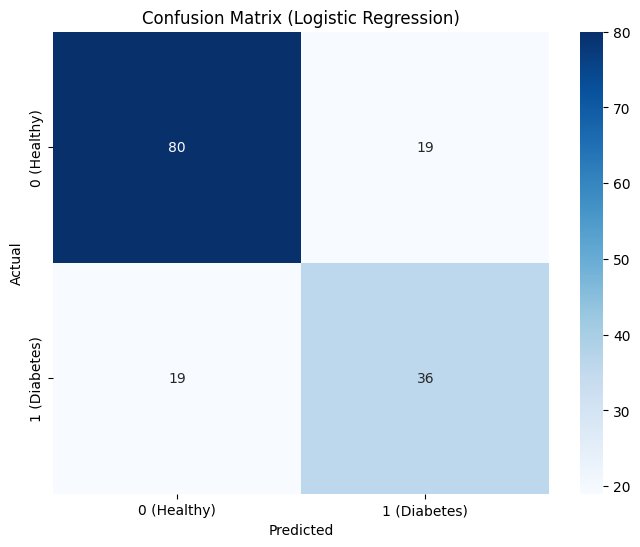

In [167]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_log)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Healthy)', '1 (Diabetes)'], yticklabels=['0 (Healthy)', '1 (Diabetes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# K-Nearest Neighbors (KNN)

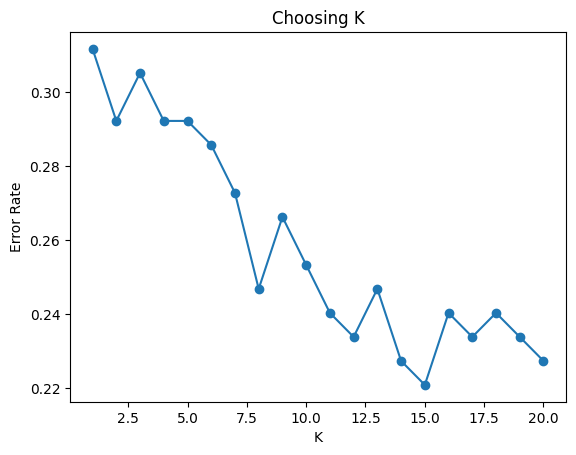

In [168]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

In [169]:
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        99
           1       0.69      0.69      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



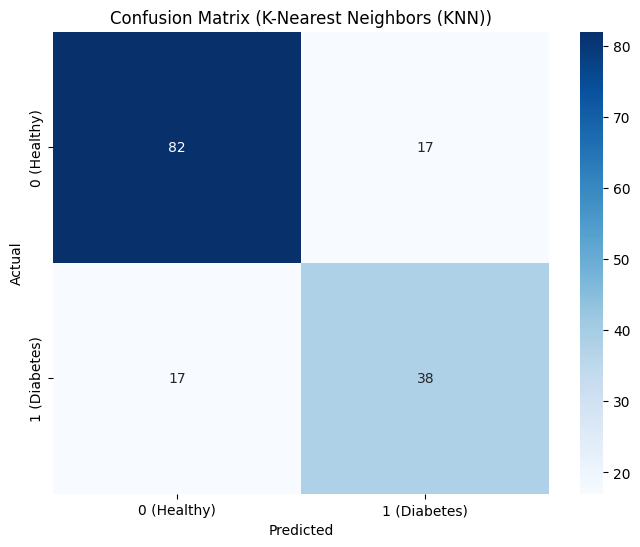

In [170]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Healthy)', '1 (Diabetes)'], yticklabels=['0 (Healthy)', '1 (Diabetes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors (KNN))')
plt.show()

# Decision Trees

Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        99
           1       0.57      0.76      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154



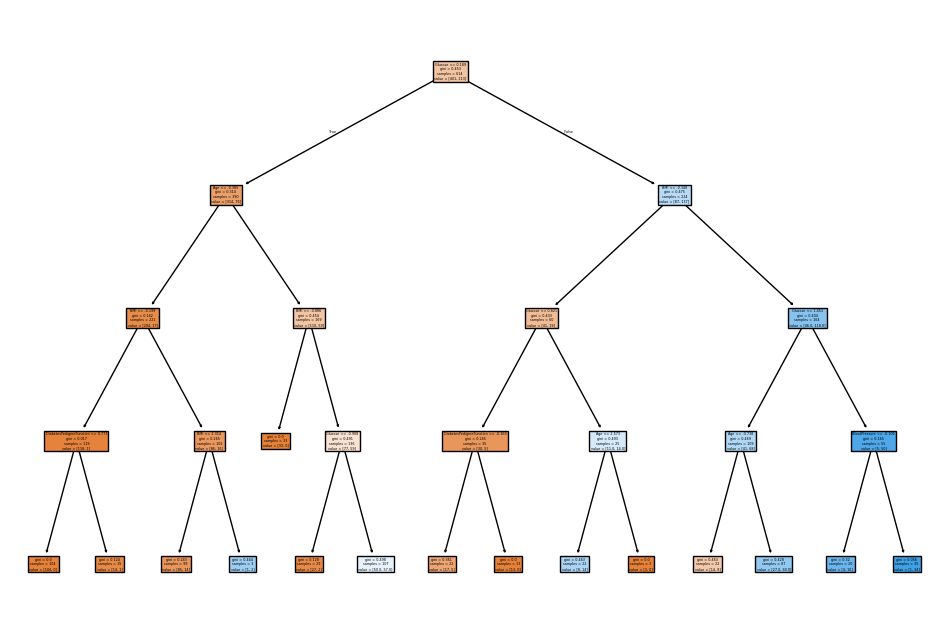

In [171]:
from sklearn.tree import plot_tree
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

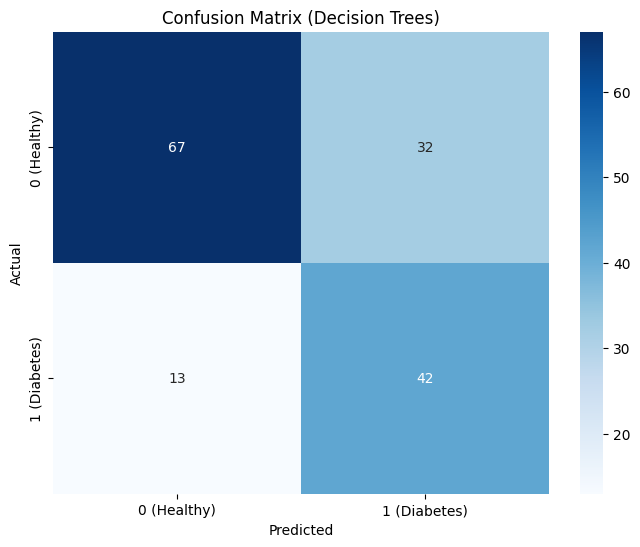

In [172]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_tree)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Healthy)', '1 (Diabetes)'], yticklabels=['0 (Healthy)', '1 (Diabetes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Trees)')
plt.show()

# Hyperparameter tuning of DT

In [173]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 2, 3, 5, 7],
    'min_samples_split': [2, 3, 5, 7],
    'max_features': ['sqrt', 'log2', None]
}


In [174]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(
    model_tree,
    grid_param,
    cv=10,
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search_dt.best_params_)


Fitting 10 folds for each of 960 candidates, totalling 9600 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'}


In [175]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'random'}

In [176]:
grid_search_dt.best_score_

np.float64(0.7802221047065044)

In [177]:
model_tree_tuned = grid_search_dt.best_estimator_
y_pred_grid = model_tree.predict(X_test_scaled)
print(accuracy_score(y_train, model_tree_tuned.predict(X_train_scaled)))
dt_acc = accuracy_score(y_test, model_tree_tuned.predict(X_test_scaled))
print(accuracy_score(y_test, model_tree_tuned.predict(X_test_scaled)))
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))

0.7654723127035831
0.7272727272727273
[[67 32]
 [13 42]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        99
           1       0.57      0.76      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154



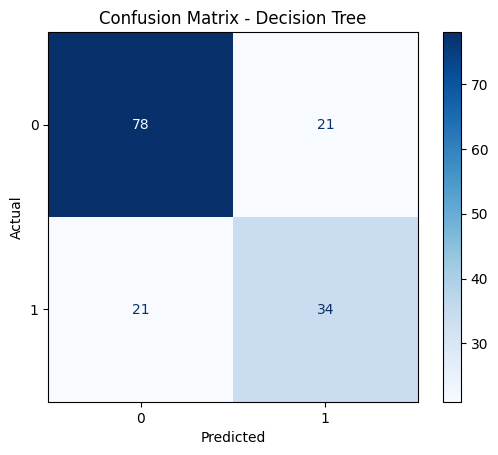

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_tree_tuned, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# Random Forest Classifier

In [179]:
model_rf = RandomForestClassifier(criterion = 'entropy',
                        max_depth = 15,
                        max_features = 0.75,
                        min_samples_leaf = 2,
                        min_samples_split = 3,
                        n_estimators = 130,
                        random_state=42)

model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        99
           1       0.68      0.75      0.71        55

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.77       154
weighted avg       0.79      0.79      0.79       154



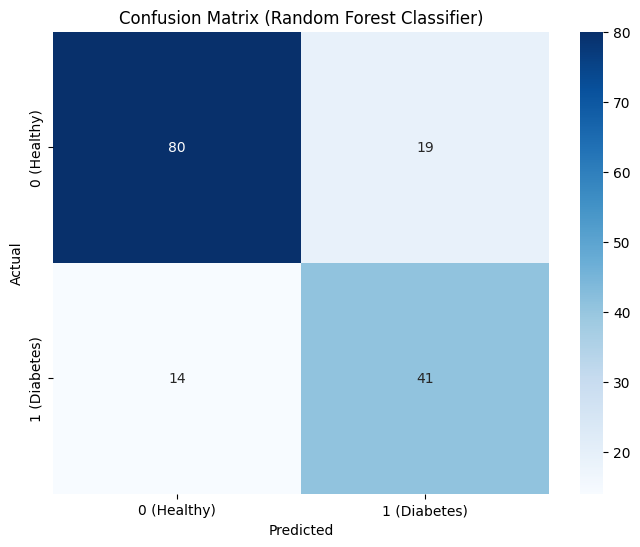

In [180]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Healthy)', '1 (Diabetes)'], yticklabels=['0 (Healthy)', '1 (Diabetes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

# Model Comparison

In [181]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Tuned Decision Tree']
accuracies = [
    accuracy_score(y_test, pred_log),
    accuracy_score(y_test, pred_knn),
    accuracy_score(y_test, pred_tree),
    accuracy_score(y_test, pred_rf),
    accuracy_score(y_test, y_pred_grid)  # from best_estimator_ (grid-searched)
]


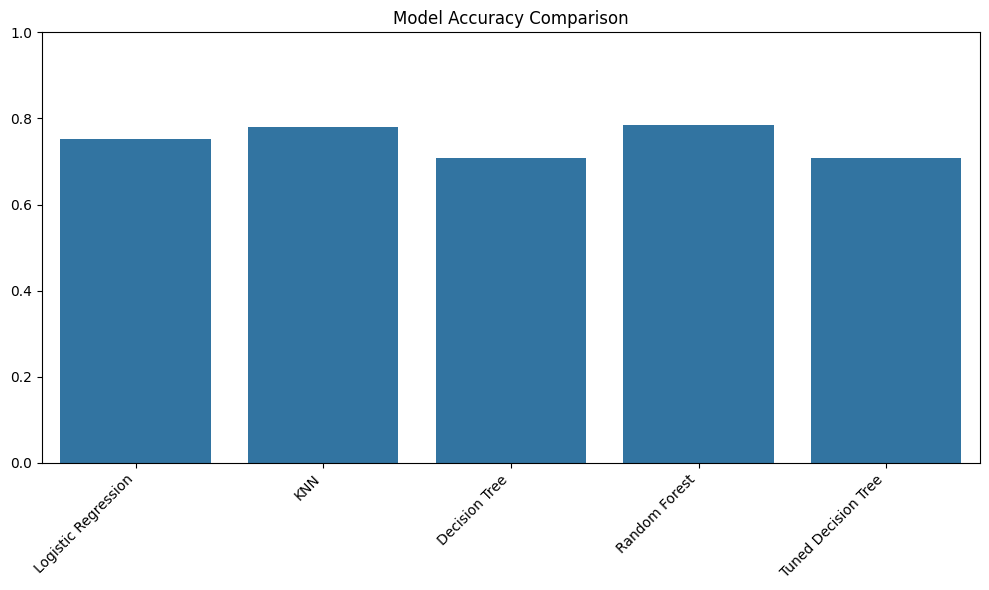

In [182]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# RoC

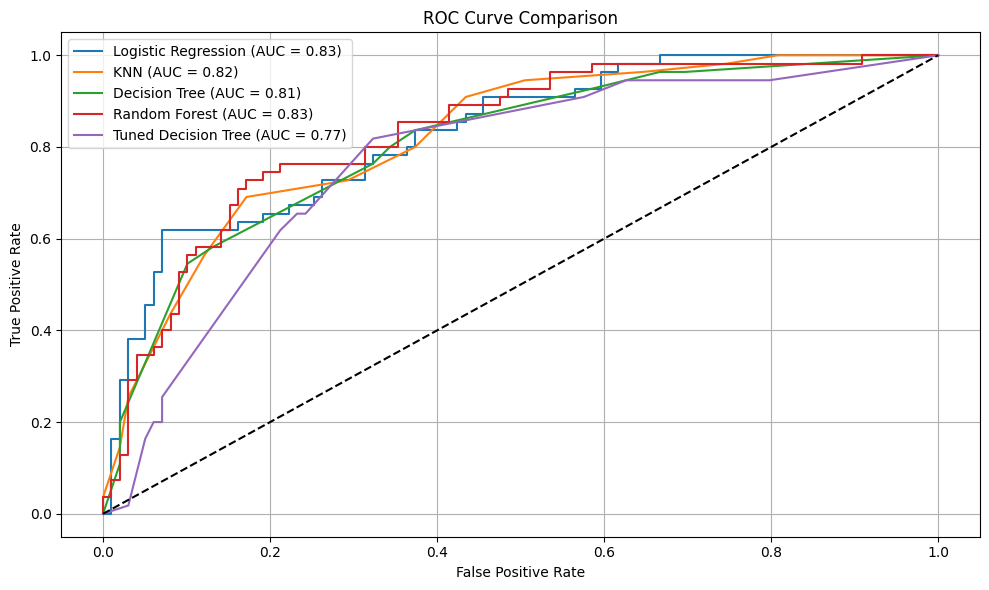

In [183]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 6))

# Logistic Regression
y_prob_log = model_log.predict_proba(X_test_scaled)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")

# KNN
y_prob_knn = model_knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = roc_auc_score(y_test, y_prob_knn)
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")

# Decision Tree (Basic)
y_prob_tree = model_tree.predict_proba(X_test_scaled)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
auc_tree = roc_auc_score(y_test, y_prob_tree)
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})")

# Random Forest
y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Tuned Decision Tree (from GridSearchCV)
y_prob_tuned = model_tree_tuned.predict_proba(X_test_scaled)[:, 1]
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
auc_tuned = roc_auc_score(y_test, y_prob_tuned)
plt.plot(fpr_tuned, tpr_tuned, label=f"Tuned Decision Tree (AUC = {auc_tuned:.2f})")

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')

# Final plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
